ウェブサイトAとウェブサイトBの訪問者数とコンバージョン数を定義

In [1]:
visitors_to_A = 1300
visitors_to_B = 1275

conversions_from_A = 120
conversions_from_B = 125

AとBの事後分布を定義

In [3]:
from scipy.stats import beta
alpha_prior = 1
beta_prior = 1

posterior_A = beta(alpha_prior + conversions_from_A,
                                   beta_prior + visitors_to_A - conversions_from_A)
posterior_B = beta(alpha_prior + conversions_from_B,
                                   beta_prior + visitors_to_B - conversions_from_B)

サンプリング

In [4]:
samples = 20000
samples_posterior_A = posterior_A.rvs(samples)
samples_posterior_B = posterior_B.rvs(samples)

print((samples_posterior_A > samples_posterior_B).mean())

0.30755


結果を描画

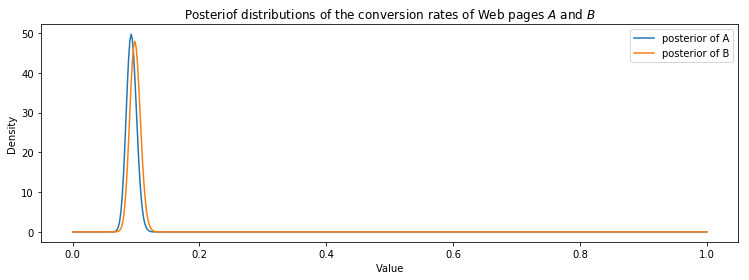

In [11]:
from IPython.core.pylabtools import figsize
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
figsize(12.5, 4)

x = np.linspace(0, 1, 500)
plt.plot(x, posterior_A.pdf(x), label='posterior of A')
plt.plot(x, posterior_B.pdf(x), label='posterior of B')

plt.xlabel('Value')
plt.ylabel('Density')
plt.title("Posteriof distributions of the conversion rates "
                "of Web pages $A$ and $B$")
plt.legend()

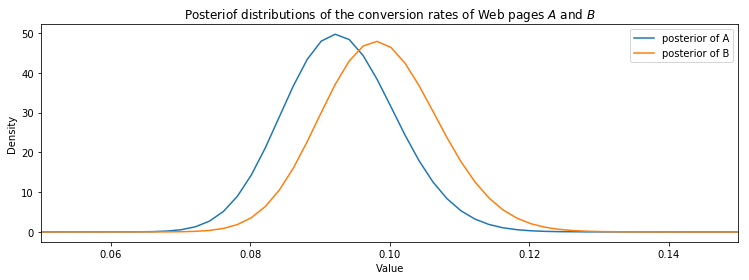

In [12]:
plt.plot(x, posterior_A.pdf(x), label='posterior of A')
plt.plot(x, posterior_B.pdf(x), label='posterior of B')

plt.xlim(0.05, 0.15)
plt.xlabel('Value')
plt.ylabel('Density')
plt.title("Posteriof distributions of the conversion rates "
                "of Web pages $A$ and $B$")
plt.legend()